## Waiter Tips (Case Study)

In [74]:
# The food server of a restaurant recorded data about the tips given to the waiters for serving the food.
# The data recorded by the food server is as follows:

#1 total_bill   : Total bill in dollars including taxes
#2 tip          : Tip given to waiters in dollars
#3 sex          : gender of the person paying the bill
#4 smoker       : whether the person smoked or not
#5 day          : day of the week
#6 time         : lunch or dinner
#7 size         : number of people in a table 

# So this is the data recorded by the restaurant. Based on this data, our task is to find the factors affecting waiter tips
# and train a machine learning model to predict the waiter’s tipping.

## Waiter Tips Prediction using Python

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

%matplotlib inline

## Data Collection

In [76]:
data = pd.read_csv(".\\data\waiters tips data.csv")
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Data Pre-Processing

In [78]:
data.info()
# print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [79]:
data.describe()
# print(data.describe())

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Now, let’s have a look at whether this dataset has any null values or not

In [80]:
data.isnull()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [81]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

So this dataset does not have any null values.

## Exploring Data

In [82]:
print(data.value_counts())

total_bill  tip    sex     smoker  day   time    size
13.00       2.00   Female  Yes     Thur  Lunch   2       2
3.07        1.00   Female  Yes     Sat   Dinner  1       1
22.23       5.00   Male    No      Sun   Dinner  2       1
20.69       2.45   Female  No      Sat   Dinner  4       1
            5.00   Male    No      Sun   Dinner  5       1
                                                        ..
15.53       3.00   Male    Yes     Sat   Dinner  2       1
15.69       1.50   Male    Yes     Sun   Dinner  2       1
            3.00   Male    Yes     Sat   Dinner  3       1
15.77       2.23   Female  No      Sat   Dinner  2       1
50.81       10.00  Male    Yes     Sat   Dinner  3       1
Length: 243, dtype: int64


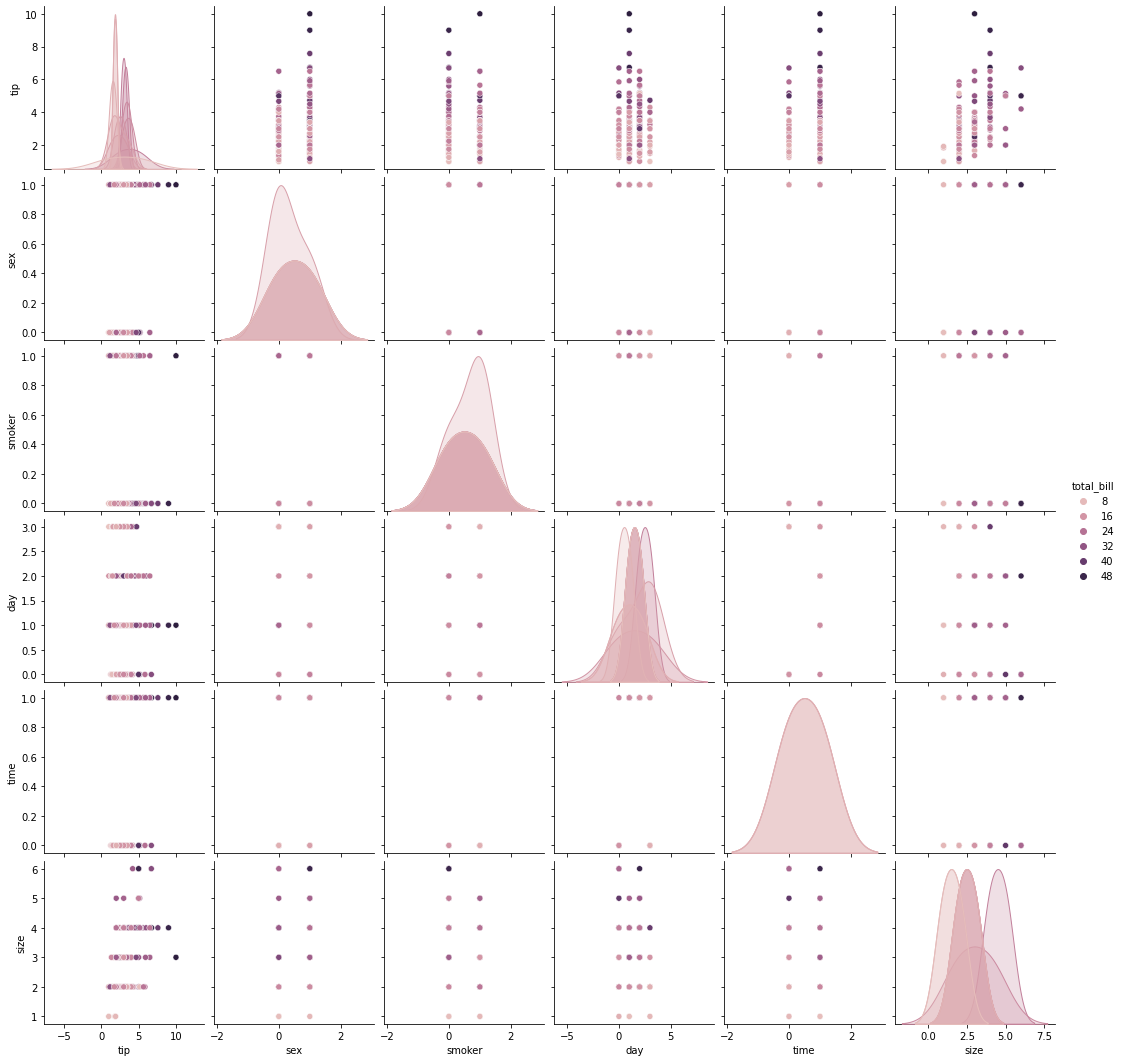

In [108]:
sns.pairplot(data, hue="total_bill")

## Waiter Tips Analysis

In [84]:
import plotly.express as px

In [85]:
# Let’s have a look at the tips given to the waiters according to

#1 the total bill paid
#2 number of people at a table
#3 and the day of the week

In [86]:
figure = px.scatter(data_frame= data, x = "total_bill",
                    y = 'tip', size="size", color= "day", trendline= "ols")

figure.show()

In [87]:
# Let’s have a look at the tips given to the waiters according to

#1 the total bill paid
#2 number of people at a table
#3 and the gender of the person paying the bill

In [88]:
figure = px.scatter(data_frame= data, x= "total_bill",
                    y= "tip", size= "size", color= "sex", trendline= "ols")

figure.show()

In [89]:
# Let’s have a look at the tips given to the waiters according to

#1 the total bill paid
#2 number of people at a table
#3 and the time of the meal

In [90]:
figure = px.scatter(data_frame= data, x= "total_bill",
                    y= "tip", size="size",color="time", trendline="ols")

figure.show()

In [91]:
# Now let’s see the tips given to the waiters according to the days to find out which day
# the most tips are given to the waiters

In [92]:
figure = px.pie(data,
                values='tip',
                names='day',
                hole=0.5)

figure.show()

In [93]:
# According to the visualization above, on Saturdays, most tips are given to the waiters.
# Now let’s look at the number of tips given to waiters by gender of the person paying
# the bill to see who tips waiters the most

In [94]:
figure = px.pie(data,
                values="tip",
                names="sex",
                hole=0.5)

figure.show()

In [95]:
# According to the visualization above, most tips are given by men.
# Now let’s see if a smoker tips more or a non-smoker

In [96]:
figure = px.pie(data,
                values="tip",
                names="smoker",hole=0.5)

figure.show()

In [97]:
# According to the visualization above, non-smoker tips waiters more than smokers.
# Now let’s see if most tips are given during lunch or dinner

In [98]:
figure = px.pie(data,
                values="tip",
                names="time", hole=0.5)

figure.show()

According to the visualization above, a waiter is tipped more during dinner.

## Categorical values into numerical values

In [99]:
# Before training a waiter tips prediction model, I will do some data transformation by transforming
# the categorical values into numerical values

In [100]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0,"Sat": 1, "Sun": 2, "Fri": 3})
data["time"] = data['time'].map({"Lunch": 0, "Dinner": 1})

data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,1,2
1,10.34,1.66,1,0,2,1,3
2,21.01,3.50,1,0,2,1,3
3,23.68,3.31,1,0,2,1,2
4,24.59,3.61,0,0,2,1,4


## Feature Selection

In [101]:
feature = np.array(data[["total_bill", "sex","smoker","day","time","size"]])
target = np.array(data[["tip"]])

## Splitting the data

In [102]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(feature,target, test_size=0.2, random_state=42)

## Training a machine learning model

In [103]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

## Model Score

In [104]:
model.score(xtest,ytest)

0.43902808224220735

In [105]:
# Now let’s test the performance of this model by giving inputs to this model
# according to the features that we have used to train this model

In [106]:
# feature = np.array(data[["total_bill", "sex","smoker","day","time","size"]])
feature = np.array([[24.50,1,0,0,1,4]])
model.predict(feature)

array([[3.77072436]])

## Thank You